In [2]:
import matplotlib.pyplot as plt
import cv2

from process_datasets.augmentation.augmentation import stretch, distort, perspective

In [7]:
# def show_results(doc_path):
#     dataset_path = get_page_dataset(os.path.join("data", doc_path), "result")
#     opt = get_opt(eval_data=dataset_path, saved_model="iter_300000.pth")
#     word_list = test(opt)
#     axes_x = 3
#     axes_y = min(len(word_list) // 3, 6)
#     len_axes = axes_x * axes_y
#     fig, axes = plt.subplots(axes_y, axes_x)
#     fig.set_figheight(15)
#     fig.set_figwidth(15)
#
#     for i, word in enumerate(word_list):
#         if i >= len_axes:
#             break
#         img_name = f"result/data/{i:03d}.png"
#         im = cv2.imread(img_name)
#         axes[i//3,i%3].set_title(f"predicted: {word}")
#         axes[i//3,i%3].imshow(im)
#         axes[i//3,i%3].axis('off')
#
# show_results("1.jpg")


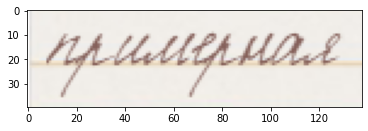

In [116]:
img_name = "datasets/rus_out/img/rustesttest431.png"
im = cv2.imread(img_name)
plt.imshow(im)

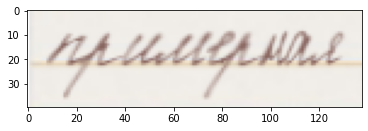

In [117]:
plt.imshow(stretch(stretch(im, 2), 2))

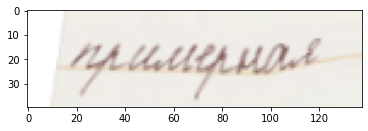

In [118]:
plt.imshow(distort(distort(im, 4), 4))

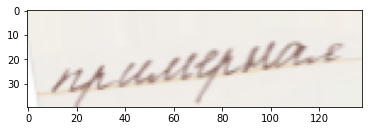

In [119]:
plt.imshow(perspective(perspective(im)))